# 01- Importing datasets, libraries; preparing data for KNN

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
path=r'C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Specialization- Machine Learning'

In [3]:
df=pd.read_csv(os.path.join(path, 'Data Sets', 'climate_scaled.csv'), index_col=False)

In [4]:
df.head()

,Unnamed: 0,id,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,0,0,19600101,1,0.660514,-0.02793,0.826097,-0.001949,-1.101066,-0.265148,...,-0.443701,0.761754,-1.299744,-0.806427,-0.088407,-0.024706,0.372147,-0.668215,-0.519743,-0.752237
1,1,1,19600102,1,0.244897,-0.02793,0.735760,-0.001949,-1.058108,1.658760,...,0.783085,1.183580,-1.262455,-1.042055,0.503361,-0.024706,-0.829285,-0.548046,-0.629054,-0.407141
2,2,2,19600103,1,1.076130,-0.02793,1.277781,-0.001949,-1.251420,0.155707,...,0.783085,1.183580,-0.432779,-1.136306,-0.396127,-0.024706,-1.009500,-0.067372,0.054135,-0.177078
3,3,3,19600104,1,-1.001953,-0.02793,1.458455,-0.001949,-0.821838,-0.445514,...,0.783085,0.480538,0.387574,-1.183432,0.669056,-0.024706,-1.039536,-0.998679,-0.164486,-0.838511
4,4,4,19600105,1,0.244897,-0.02793,1.729466,-0.001949,-0.746661,-0.164944,...,-1.670486,-0.363113,1.729970,-0.794645,-0.490810,-0.024706,0.672505,-1.509396,-1.339569,-1.471186


In [5]:
#dropping columns pertaining to the 3 stations not included in the answers dataset
df_drop=df.drop(columns=['GDANSK_cloud_cover','GDANSK_humidity', 'GDANSK_precipitation','GDANSK_snow_depth','GDANSK_temp_mean','GDANSK_temp_min','GDANSK_temp_max','ROMA_cloud_cover','ROMA_wind_speed','ROMA_humidity','ROMA_pressure','ROMA_sunshine','ROMA_temp_mean','TOURS_wind_speed','TOURS_humidity','TOURS_pressure','TOURS_global_radiation','TOURS_precipitation','TOURS_temp_mean','TOURS_temp_min','TOURS_temp_max'])

In [6]:
#importing answers dataset
answers=pd.read_csv(os.path.join(path, 'Data Sets', 'Pleasant_Weather_Answers.csv'), index_col=False)

In [7]:
# Drop 'Unnamed: 0' from both DataFrames
df_drop = df_drop.drop(columns=['Unnamed: 0'], errors='ignore')
answers = answers.drop(columns=['Unnamed: 0'], errors='ignore')

In [8]:
locations = list({x.split("_")[0] for x in df_drop.columns if x not in ["MONTH", "DATE", "Unnamed: 0", "id"]})
locations.sort()
print(locations)  # VALENTIA should now be present, and 'Unnamed: 0' should be gone

['BASEL', 'BELGRADE', 'BUDAPEST', 'DEBILT', 'DUSSELDORF', 'HEATHROW', 'KASSEL', 'LJUBLJANA', 'MAASTRICHT', 'MADRID', 'MUNCHENB', 'OSLO', 'SONNBLICK', 'STOCKHOLM', 'VALENTIA']


In [9]:
#importing other libraries
import seaborn as sns
import operator
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

In [10]:
#Create an 'X' matrix by dropping the unneeded columns.
X = df_drop.drop(['DATE', 'MONTH'], axis=1)
y = answers.drop(['DATE'], axis=1)

In [11]:
from sklearn.multioutput import MultiOutputClassifier

In [12]:
print(X.shape)
print(y.shape)

(22950, 148)
(22950, 15)


In [13]:
#Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [14]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 148)
(5738, 148)
(17212, 15)
(5738, 15)


# 02- Running the KNN

In [15]:
#Run the model with neighbors equal to 1 to 4, test the accuracy
k_range = np.arange(1,4)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    print("i -", i)
    print("k -", k_range)
    knn = KNeighborsClassifier(n_neighbors=k)
    classifier = MultiOutputClassifier(knn, n_jobs=-1) #ADD THIS LINE
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, np.array(y_train)) #CHANGE THIS LINE
    test_acc[i] = knn.score(X_test, np.array(y_test)) #CHANGE THIS LINE

i - 0
k - [1 2 3]
i - 1
k - [1 2 3]
i - 2
k - [1 2 3]


<function matplotlib.pyplot.show(close=None, block=None)>

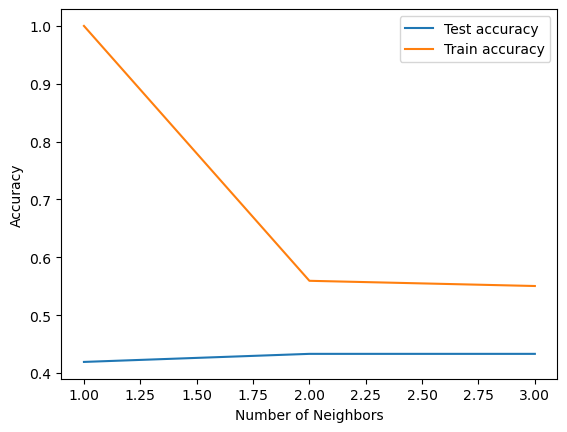

In [16]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

In [ ]:
#that sure doesnt look too accurate.

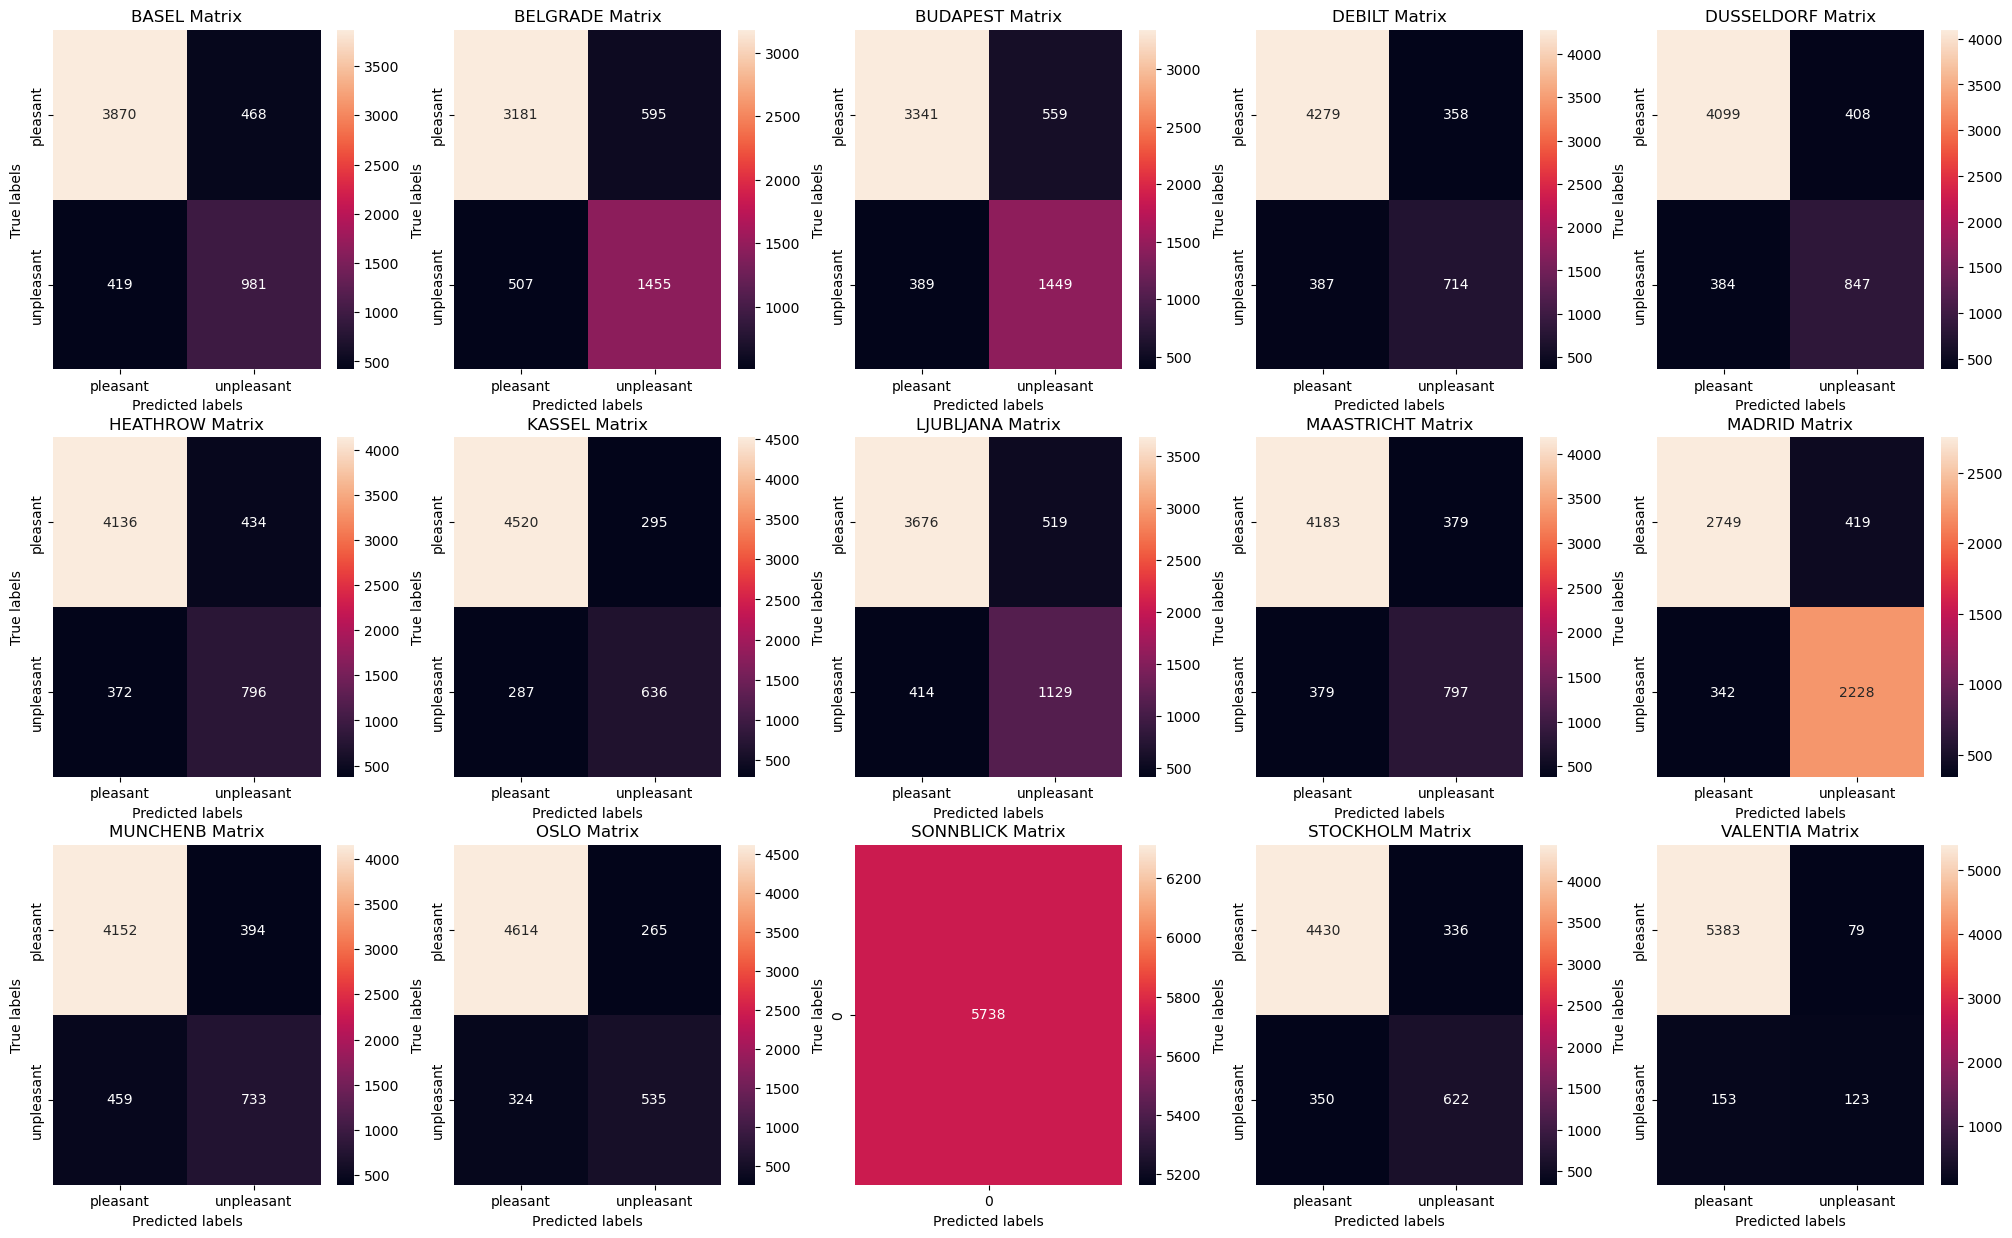

In [17]:
#plotting the multilabel confusion matrix
locations = list({x.split("_")[0] for x in df_drop.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        col_name = name + key
        
        if col_name in y_test.columns:
            cm = confusion_matrix(y_test.loc[:, col_name], y_pred[:, count])
            disp = ConfusionMatrixDisplay(confusion_matrix=cm)
            ax[i, j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
            # labels, title and ticks
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels')
            ax[i, j].set_title(name + ' Matrix')
            
            # Only set tick labels if both classes are present
            if cm.shape == (2, 2):
                ax[i, j].xaxis.set_ticklabels(labels)
                ax[i, j].yaxis.set_ticklabels(labels)
        else:
            print(f"Column {col_name} not found in y_test")
        
        count += 1


In [ ]:
#what's going on with SONNBLICK's matrix? let's try to find out

In [18]:
print(y_test["SONNBLICK_pleasant_weather"].value_counts())

SONNBLICK_pleasant_weather
0    5738
Name: count, dtype: int64


In [ ]:
#SONNBLICK has no pleasant days?!

# 03- KNN round 2, with less neighbors

In [19]:
#Run the model with neighbors equal to 1 to 3, test the accuracy
k_range = np.arange(1,3)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, y_train)
    test_acc[i] = knn.score(X_test, y_test)

<function matplotlib.pyplot.show(close=None, block=None)>

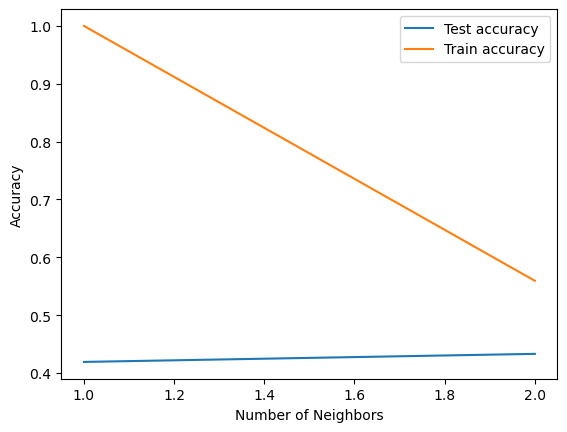

In [20]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

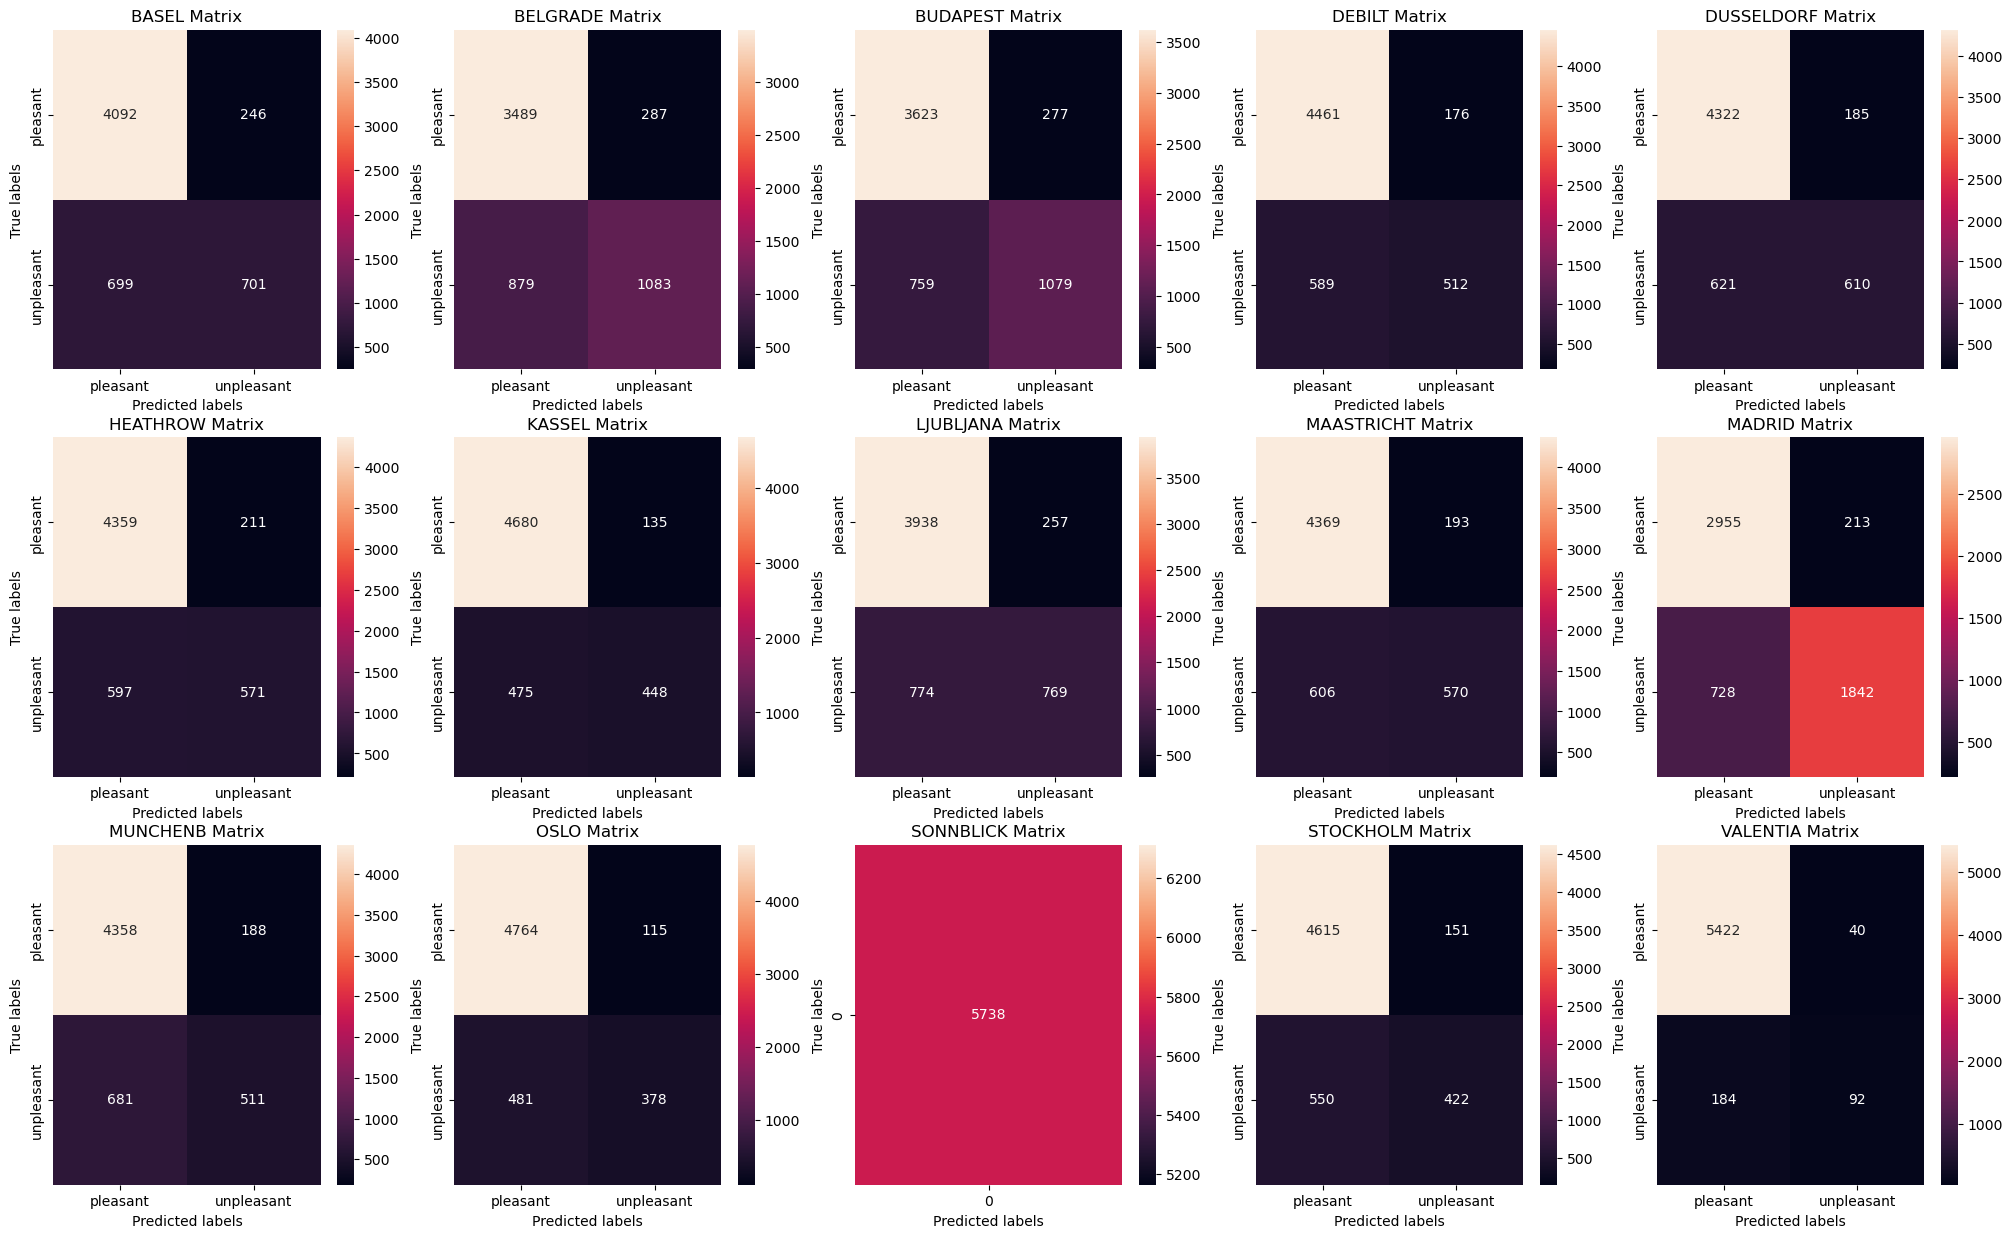

In [21]:
#plotting the multilabel confusion matrix
locations = list({x.split("_")[0] for x in df_drop.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        col_name = name + key
        
        if col_name in y_test.columns:
            cm = confusion_matrix(y_test.loc[:, col_name], y_pred[:, count])
            disp = ConfusionMatrixDisplay(confusion_matrix=cm)
            ax[i, j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
            # labels, title and ticks
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels')
            ax[i, j].set_title(name + ' Matrix')
            
            # Only set tick labels if both classes are present
            if cm.shape == (2, 2):
                ax[i, j].xaxis.set_ticklabels(labels)
                ax[i, j].yaxis.set_ticklabels(labels)
        else:
            print(f"Column {col_name} not found in y_test")
        
        count += 1

In [ ]:
#let's try adding MORE neighbors, just to see what happens.

# 04- KNN round 3, with more neighbors

In [77]:
#Run the model with neighbors equal to 1 to 10, test the accuracy
k_range = np.arange(1,10)
train_acc = np.empty(len(k_range))
test_acc = np.empty(len(k_range))
scores = {}
scores_list = []
for i, k in enumerate(k_range):
    knn = KNeighborsClassifier(n_neighbors=k)
    ## Fit the model on the training data.
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred = knn.predict(X_test)
    train_acc[i] = knn.score(X_train, y_train)
    test_acc[i] = knn.score(X_test, y_test)

<function matplotlib.pyplot.show(close=None, block=None)>

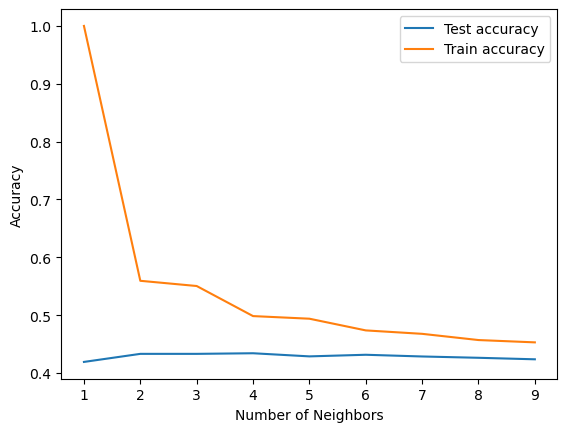

In [78]:
#plot the relationship between number of neighbors and accuracy
plt.plot(k_range, test_acc, label = 'Test accuracy')
plt.plot(k_range, train_acc, label = 'Train accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show

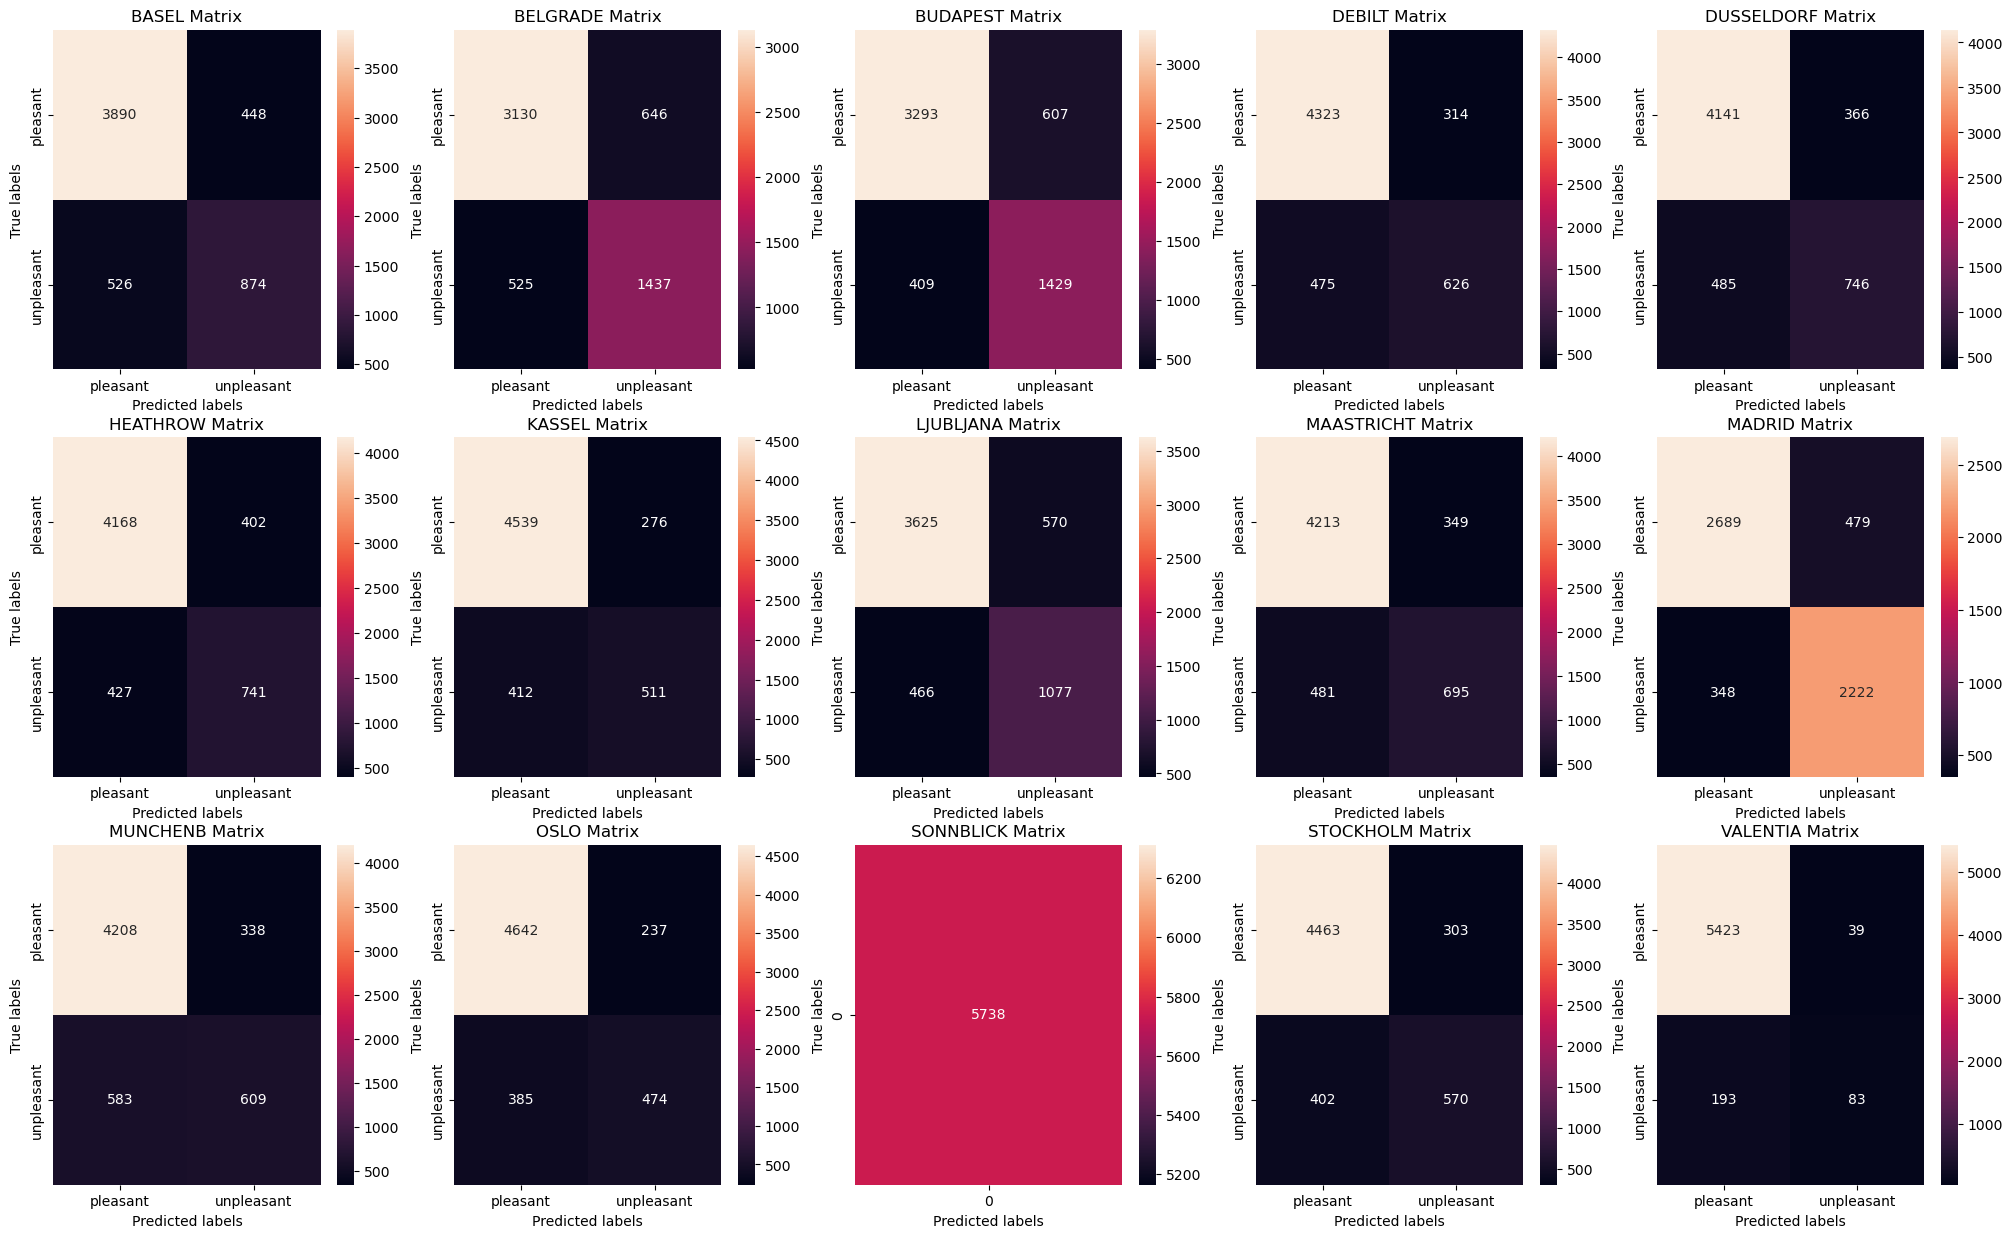

In [81]:
#plotting the multilabel confusion matrix
locations = list({x.split("_")[0] for x in df_drop.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations
key = "_pleasant_weather"
stations = []
figure, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        col_name = name + key
        
        if col_name in y_test.columns:
            cm = confusion_matrix(y_test.loc[:, col_name], y_pred[:, count])
            disp = ConfusionMatrixDisplay(confusion_matrix=cm)
            ax[i, j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
            # labels, title and ticks
            ax[i, j].set_xlabel('Predicted labels')
            ax[i, j].set_ylabel('True labels')
            ax[i, j].set_title(name + ' Matrix')
            
            # Only set tick labels if both classes are present
            if cm.shape == (2, 2):
                ax[i, j].xaxis.set_ticklabels(labels)
                ax[i, j].yaxis.set_ticklabels(labels)
        else:
            print(f"Column {col_name} not found in y_test")
        
        count += 1

# 05- Trying a weighted KNN

In [16]:
knn_weighted = KNeighborsClassifier(n_neighbors=4, weights='distance')

In [17]:
knn_weighted.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [18]:
y_pred_weighted = knn_weighted.predict(X_test)

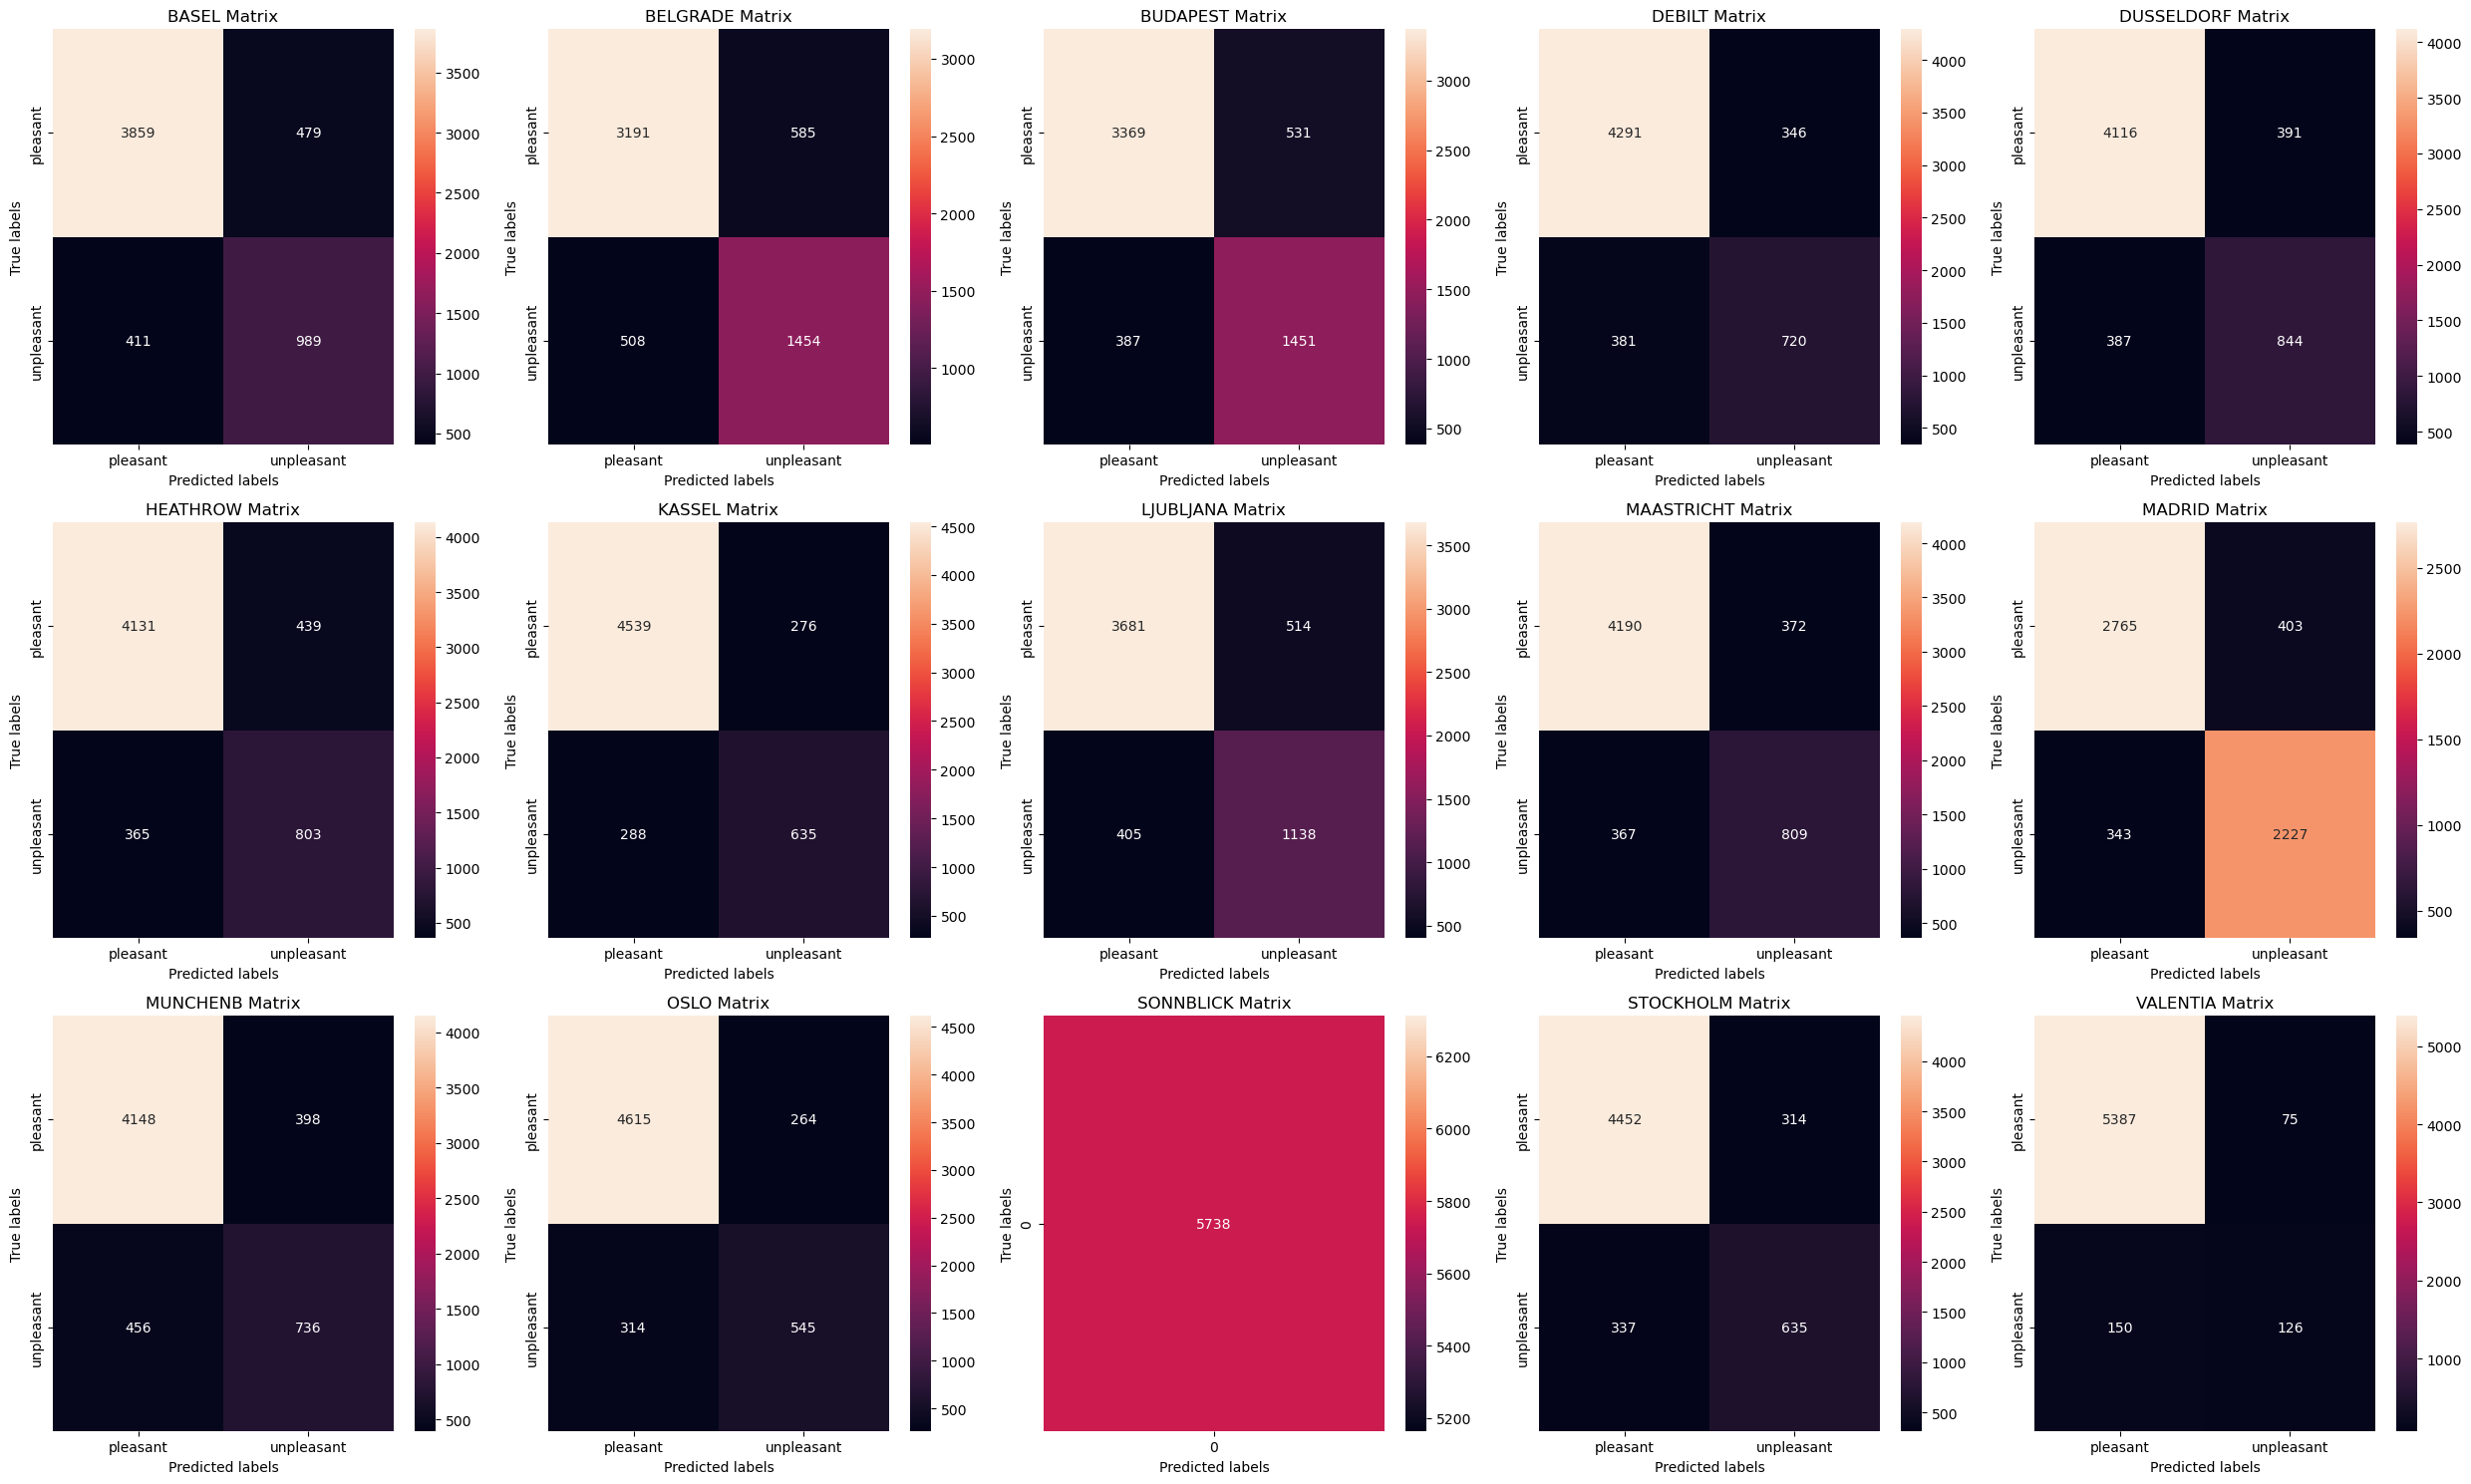

In [19]:
locations = list({x.split("_")[0] for x in df_drop.columns if x not in ["MONTH", "DATE"]})
locations.sort()
key = "_pleasant_weather"
figure, ax = plt.subplots(3, 5, figsize=(25, 15))
labels = ['pleasant', 'unpleasant']
count = 0

for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:, name + key], y_pred_weighted[:, count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i, j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i, j])
        # labels, title and ticks
        ax[i, j].set_xlabel('Predicted labels')
        ax[i, j].set_ylabel('True labels')
        ax[i, j].set_title(name + ' Matrix')
        
        if cm.shape == (2, 2):
            ax[i, j].xaxis.set_ticklabels(labels)
            ax[i, j].yaxis.set_ticklabels(labels)
        count += 1

plt.tight_layout()
plt.show()

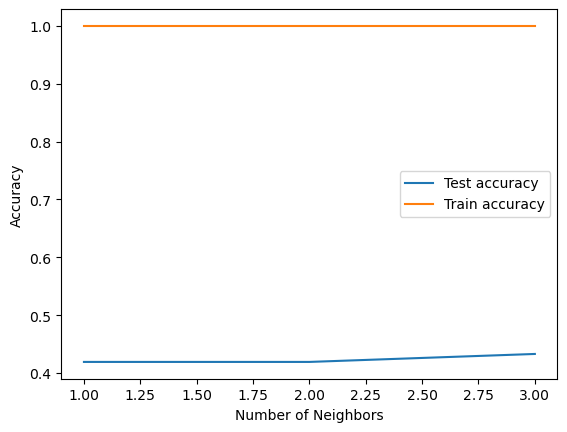

In [20]:
train_accuracy = []
test_accuracy = []
neighbors = range(1, 4)

for n in neighbors:
    knn_weighted = KNeighborsClassifier(n_neighbors=n, weights='distance')
    knn_weighted.fit(X_train, y_train)

    train_accuracy.append(knn_weighted.score(X_train, y_train))
    test_accuracy.append(knn_weighted.score(X_test, y_test))

plt.plot(neighbors, test_accuracy, label='Test accuracy')
plt.plot(neighbors, train_accuracy, label='Train accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.legend()
plt.show()

# 06- Trying undersampling to improve KNN

In [27]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=4, weights='distance')

# Initialize the multi-output classifier with KNN
multi_target_knn = MultiOutputClassifier(knn)

# Initialize the random undersampler
undersampler = RandomUnderSampler(random_state=42)

# Initialize lists to hold the final resampled X and y data
X_train_resampled = None
y_train_resampled = pd.DataFrame()

# Loop through each label (station) in y_train
for column in y_train.columns:
    # Check if the column has more than one class
    if len(y_train[column].unique()) > 1:
        # Apply undersampling to both X_train and y_train[column] together
        X_res, y_res = undersampler.fit_resample(X_train, y_train[column])
        
        if X_train_resampled is None:
            # Store the first resampled X_train
            X_train_resampled = X_res
        y_train_resampled[column] = y_res  # Store resampled y for the current station
    else:
        # If only one class, append original y values without resampling
        y_train_resampled[column] = y_train[column].values[:len(X_train_resampled)]  # Match the index length

# Diagnostic: Check for NaN values in y_train_resampled
if y_train_resampled.isna().sum().sum() > 0:
    print("NaN values detected in y_train_resampled. Here are the columns with NaN values:")
    print(y_train_resampled.isna().sum())

# If NaNs are present, we can attempt to fill them as a stopgap solution
y_train_resampled.fillna(method='ffill', inplace=True)  # Forward-fill NaNs if present

# Ensure the dimensions match between X_train and y_train
print(f"X_train_resampled shape: {X_train_resampled.shape}")
print(f"y_train_resampled shape: {y_train_resampled.shape}")

# Train the multi-output KNN model on the resampled data
multi_target_knn.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_weighted = multi_target_knn.predict(X_test)

# Continue with confusion matrices, accuracy plots, and additional metrics

NaN values detected in y_train_resampled. Here are the columns with NaN values:
BASEL_pleasant_weather            0
BELGRADE_pleasant_weather      2216
BUDAPEST_pleasant_weather      2448
DEBILT_pleasant_weather        4410
DUSSELDORF_pleasant_weather    4009
HEATHROW_pleasant_weather      4028
KASSEL_pleasant_weather        4998
LJUBLJANA_pleasant_weather     3026
MAASTRICHT_pleasant_weather    4085
MADRID_pleasant_weather         748
MUNCHENB_pleasant_weather      4063
OSLO_pleasant_weather          5341
SONNBLICK_pleasant_weather        0
STOCKHOLM_pleasant_weather     5193
VALENTIA_pleasant_weather      7464
dtype: int64
X_train_resampled shape: (8528, 148)
y_train_resampled shape: (8528, 15)


C:\Users\jphil\AppData\Local\Temp\ipykernel_21476\4146393476.py:40: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y_train_resampled.fillna(method='ffill', inplace=True)  # Forward-fill NaNs if present


ValueError: Input y contains NaN.

In [29]:
from imblearn.under_sampling import RandomUnderSampler
from sklearn.multioutput import MultiOutputClassifier
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=4, weights='distance')

# Initialize the multi-output classifier with KNN
multi_target_knn = MultiOutputClassifier(knn)

# Initialize the random undersampler
undersampler = RandomUnderSampler(random_state=42)

# Apply undersampling to the first column of y_train to get consistent indices
X_train_resampled, y_first_resampled = undersampler.fit_resample(X_train, y_train.iloc[:, 0])

# Use the indices from the first column to resample all of y_train
y_train_resampled = y_train.loc[y_first_resampled.index]

# Ensure no NaN values remain (shouldn't be necessary but for safety)
y_train_resampled.ffill(inplace=True)  # Forward-fill NaN values (if present)

# Train the multi-output KNN model on the resampled data
multi_target_knn.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test data
y_pred_weighted = multi_target_knn.predict(X_test)

# Continue with confusion matrices, accuracy plots, and additional metrics

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Evaluate model performance for each station
accuracy = accuracy_score(y_test, y_pred_weighted)
precision = precision_score(y_test, y_pred_weighted, average='macro')  # Average across all labels
recall = recall_score(y_test, y_pred_weighted, average='macro')        # Average across all labels
f1 = f1_score(y_test, y_pred_weighted, average='macro')                # Average across all labels

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro Avg): {precision:.4f}")
print(f"Recall (Macro Avg): {recall:.4f}")
print(f"F1 Score (Macro Avg): {f1:.4f}")

Accuracy: 0.3984
Precision (Macro Avg): 0.5862
Recall (Macro Avg): 0.6538
F1 Score (Macro Avg): 0.6149


C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [33]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt
import os

# Specify the directory to save confusion matrices
output_dir = r"C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Specialization- Machine Learning\Analysis"

# Create the directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Plot and save confusion matrices for each station
for i, column in enumerate(y_test.columns):
    cm = confusion_matrix(y_test[column], y_pred_weighted[:, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot the confusion matrix
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"Confusion Matrix for {column}")
    
    # Save the confusion matrix image
    output_path = os.path.join(output_dir, f"{column}_confusion_matrix.png")
    plt.savefig(output_path)
    plt.close()  # Close the plot to avoid display issues

    print(f"Confusion matrix for {column} saved at {output_path}")


Confusion matrix for BASEL_pleasant_weather saved at C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Specialization- Machine Learning\Analysis\BASEL_pleasant_weather_confusion_matrix.png
Confusion matrix for BELGRADE_pleasant_weather saved at C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Specialization- Machine Learning\Analysis\BELGRADE_pleasant_weather_confusion_matrix.png
Confusion matrix for BUDAPEST_pleasant_weather saved at C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Specialization- Machine Learning\Analysis\BUDAPEST_pleasant_weather_confusion_matrix.png
Confusion matrix for DEBILT_pleasant_weather saved at C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Specialization- Machine Learning\Analysis\DEBILT_pleasant_weather_confusion_matrix.png
Confusion matrix for DUSSELDORF_pleasant_weather saved at C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Specialization- Machine Learning\Analysis\DUSSELDORF_plea

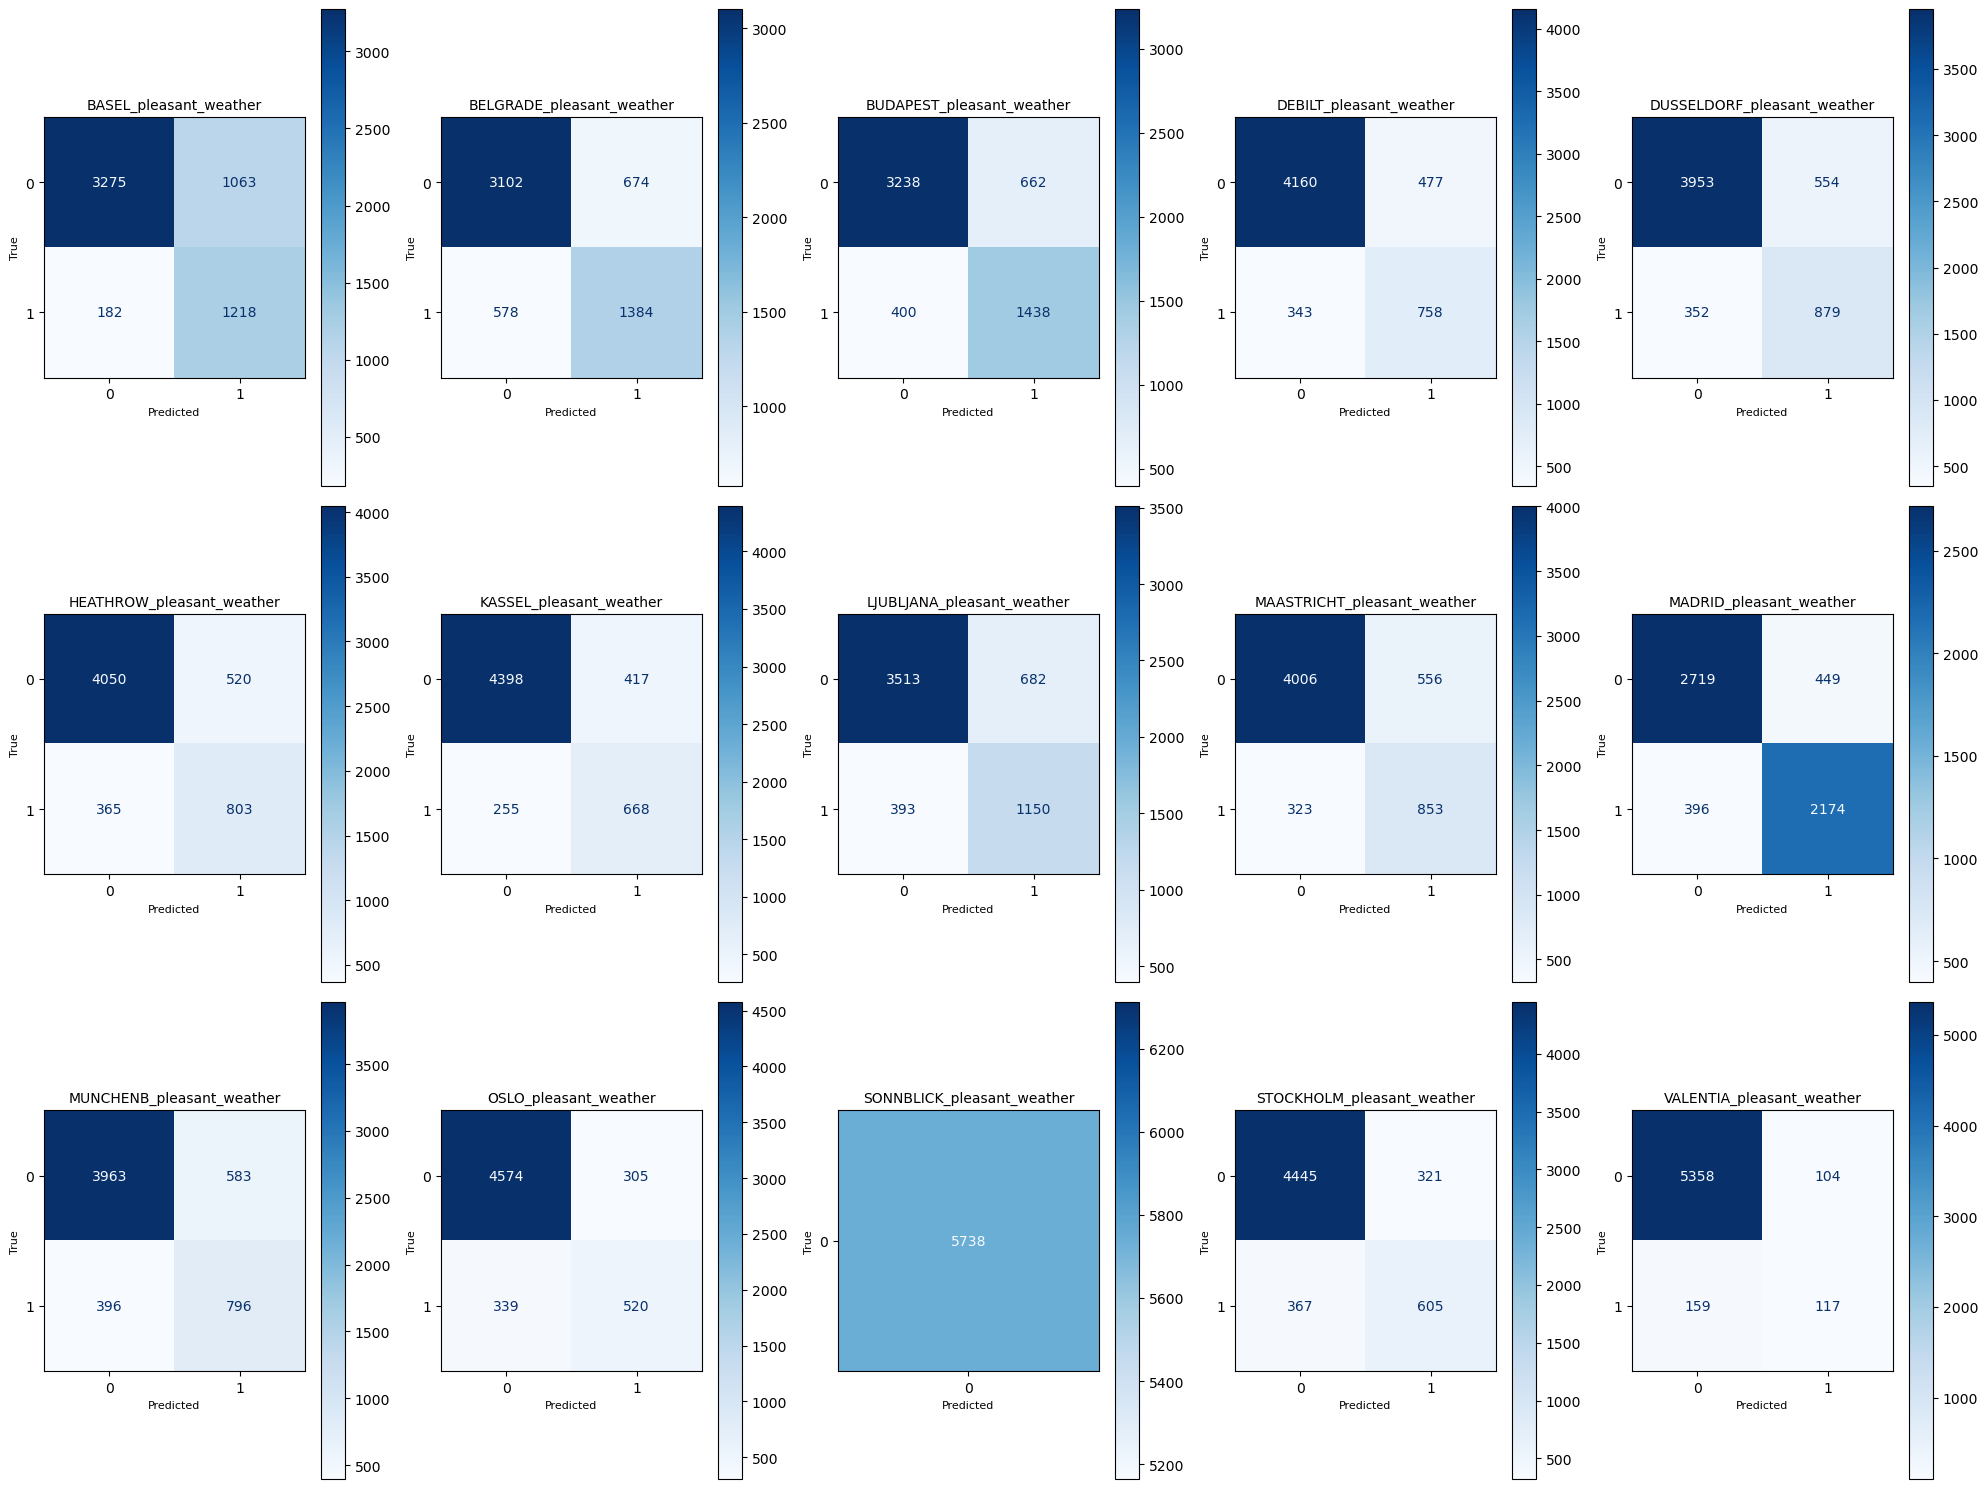

Confusion matrix chart saved at C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Specialization- Machine Learning\Analysis\all_stations_confusion_matrices.png


In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import os

# Specify the path to save the figure
save_path = r"C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Specialization- Machine Learning\Analysis\all_stations_confusion_matrices.png"

# Number of rows and columns for the subplots grid
n_rows = 3
n_cols = 5

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))  # Adjust the figure size as needed
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Plot confusion matrices for each station
for i, column in enumerate(y_test.columns):
    cm = confusion_matrix(y_test[column], y_pred_weighted[:, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot each confusion matrix in its corresponding subplot
    disp.plot(ax=axes[i], cmap=plt.cm.Blues, values_format='g')
    axes[i].set_title(f"{column}", fontsize=10)
    axes[i].set_xlabel('Predicted', fontsize=8)
    axes[i].set_ylabel('True', fontsize=8)

# Adjust layout and spacing
plt.tight_layout()

# Save the figure to the specified path
plt.savefig(save_path, dpi=300)  # Save at 300 dpi for high quality

# Show the figure
plt.show()

print(f"Confusion matrix chart saved at {save_path}")


In [35]:
# Evaluate train accuracy
y_train_pred = multi_target_knn.predict(X_train_resampled)
train_accuracy = accuracy_score(y_train_resampled, y_train_pred)

# Print train vs test accuracy
print(f"Train Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")  # Test accuracy is already calculated above

Train Accuracy: 1.0000
Test Accuracy: 0.3984


In [36]:
for i, column in enumerate(y_test.columns):
    station_accuracy = accuracy_score(y_test[column], y_pred_weighted[:, i])
    station_precision = precision_score(y_test[column], y_pred_weighted[:, i])
    station_recall = recall_score(y_test[column], y_pred_weighted[:, i])
    station_f1 = f1_score(y_test[column], y_pred_weighted[:, i])
    
    print(f"\nStation: {column}")
    print(f"Accuracy: {station_accuracy:.4f}")
    print(f"Precision: {station_precision:.4f}")
    print(f"Recall: {station_recall:.4f}")
    print(f"F1 Score: {station_f1:.4f}")


Station: BASEL_pleasant_weather
Accuracy: 0.7830
Precision: 0.5340
Recall: 0.8700
F1 Score: 0.6618

Station: BELGRADE_pleasant_weather
Accuracy: 0.7818
Precision: 0.6725
Recall: 0.7054
F1 Score: 0.6886

Station: BUDAPEST_pleasant_weather
Accuracy: 0.8149
Precision: 0.6848
Recall: 0.7824
F1 Score: 0.7303

Station: DEBILT_pleasant_weather
Accuracy: 0.8571
Precision: 0.6138
Recall: 0.6885
F1 Score: 0.6490

Station: DUSSELDORF_pleasant_weather
Accuracy: 0.8421
Precision: 0.6134
Recall: 0.7141
F1 Score: 0.6599

Station: HEATHROW_pleasant_weather
Accuracy: 0.8458
Precision: 0.6070
Recall: 0.6875
F1 Score: 0.6447

Station: KASSEL_pleasant_weather
Accuracy: 0.8829
Precision: 0.6157
Recall: 0.7237
F1 Score: 0.6653

Station: LJUBLJANA_pleasant_weather
Accuracy: 0.8127
Precision: 0.6277
Recall: 0.7453
F1 Score: 0.6815

Station: MAASTRICHT_pleasant_weather
Accuracy: 0.8468
Precision: 0.6054
Recall: 0.7253
F1 Score: 0.6600

Station: MADRID_pleasant_weather
Accuracy: 0.8527
Precision: 0.8288
Recall

C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


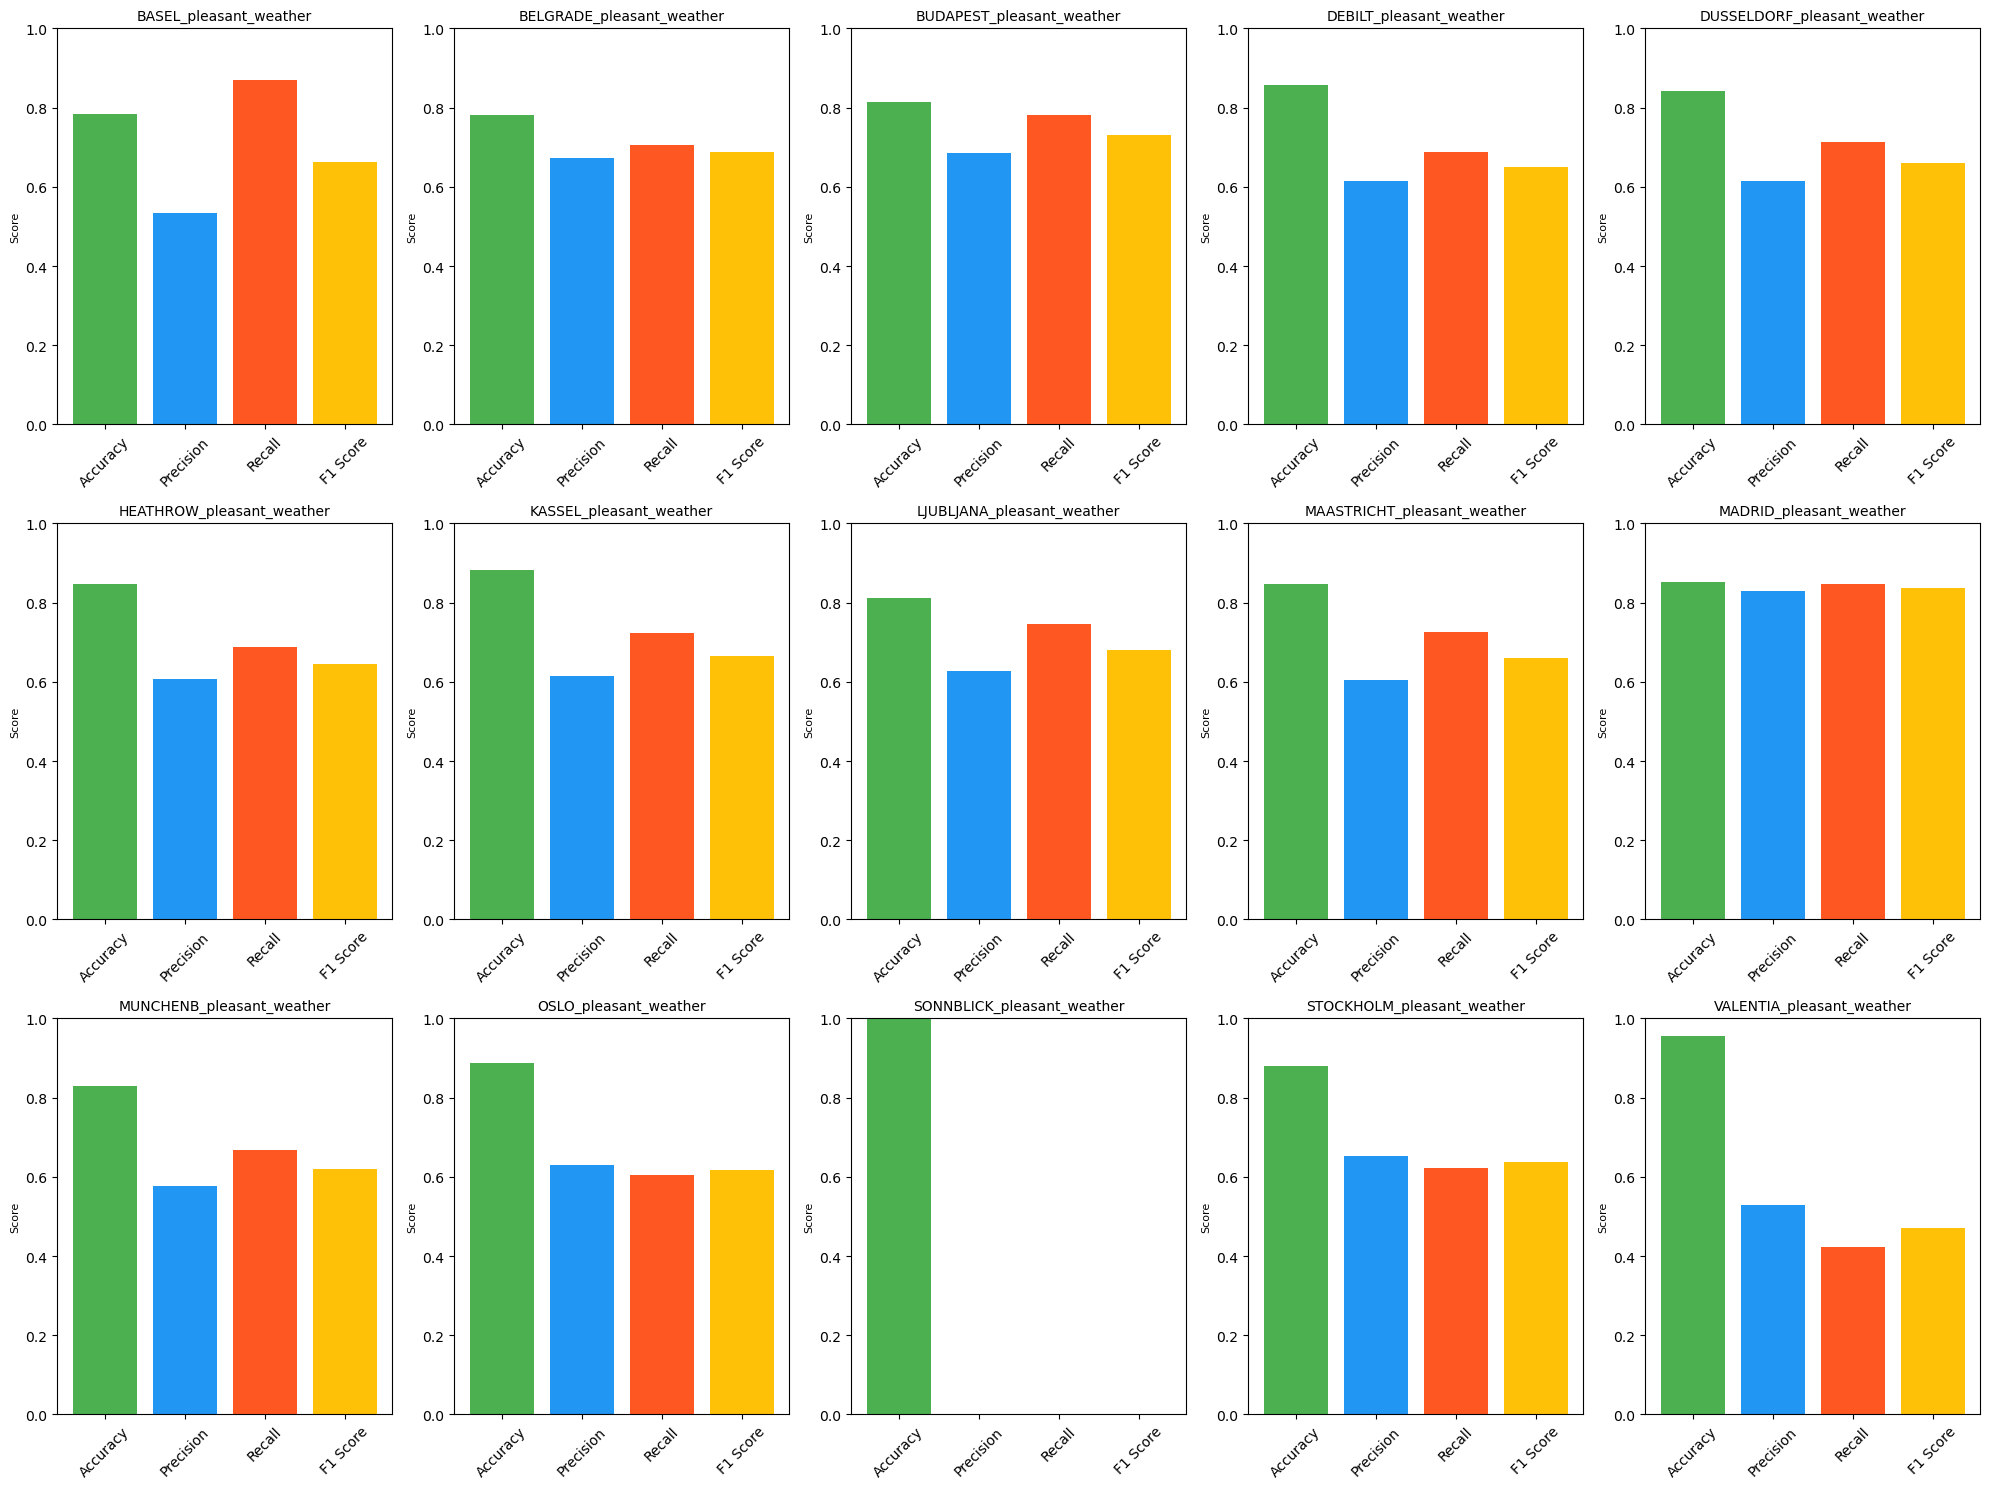

Metrics chart saved at C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Specialization- Machine Learning\Analysis\station_metrics.png


In [39]:
import matplotlib.pyplot as plt
import numpy as np
import os

# Specify the path to save the figure
save_path_metrics = r"C:\Users\jphil\OneDrive\Documents\CareerFoundry Data Analytics\Specialization- Machine Learning\Analysis\station_metrics.png"

# Metrics for each station (placeholders, replace with actual metrics from your previous results)
station_metrics = {
    'BASEL_pleasant_weather': [0.7830, 0.5340, 0.8700, 0.6618],
    'BELGRADE_pleasant_weather': [0.7818, 0.6725, 0.7054, 0.6886],
    'BUDAPEST_pleasant_weather': [0.8149, 0.6848, 0.7824, 0.7303],
    'DEBILT_pleasant_weather': [0.8571, 0.6138, 0.6885, 0.6490],
    'DUSSELDORF_pleasant_weather': [0.8421, 0.6134, 0.7141, 0.6599],
    'HEATHROW_pleasant_weather': [0.8458, 0.6070, 0.6875, 0.6447],
    'KASSEL_pleasant_weather': [0.8829, 0.6157, 0.7237, 0.6653],
    'LJUBLJANA_pleasant_weather': [0.8127, 0.6277, 0.7453, 0.6815],
    'MAASTRICHT_pleasant_weather': [0.8468, 0.6054, 0.7253, 0.6600],
    'MADRID_pleasant_weather': [0.8527, 0.8288, 0.8459, 0.8373],
    'MUNCHENB_pleasant_weather': [0.8294, 0.5772, 0.6678, 0.6192],
    'OSLO_pleasant_weather': [0.8878, 0.6303, 0.6054, 0.6176],
    'SONNBLICK_pleasant_weather': [1.0000, 0.0000, 0.0000, 0.0000],
    'STOCKHOLM_pleasant_weather': [0.8801, 0.6533, 0.6224, 0.6375],
    'VALENTIA_pleasant_weather': [0.9542, 0.5294, 0.4239, 0.4708]
}

# Create figure and axes for subplots
n_rows = 3
n_cols = 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()  # Flatten axes array for easy access

# Metrics labels
metrics_labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

# Plot bar charts for each station
for i, (station, metrics) in enumerate(station_metrics.items()):
    ax = axes[i]
    ax.bar(metrics_labels, metrics, color=['#4CAF50', '#2196F3', '#FF5722', '#FFC107'])
    ax.set_ylim(0, 1)  # Set y-axis limits to ensure consistent scale
    ax.set_title(station, fontsize=10)
    ax.set_ylabel('Score', fontsize=8)
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust layout and spacing
plt.tight_layout()

# Save the figure
plt.savefig(save_path_metrics, dpi=300)

# Show the figure
plt.show()

print(f"Metrics chart saved at {save_path_metrics}")

# 07- Adjusting class weights

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize KNN with distance-based weighting
knn = KNeighborsClassifier(n_neighbors=4, weights='distance')

# Use MultiOutputClassifier to handle multi-label classification
multi_target_knn = MultiOutputClassifier(knn)

# Train the model on the original training data (without resampling)
multi_target_knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred_weighted = multi_target_knn.predict(X_test)

# Evaluate model performance for each station
accuracy = accuracy_score(y_test, y_pred_weighted)
precision = precision_score(y_test, y_pred_weighted, average='macro')
recall = recall_score(y_test, y_pred_weighted, average='macro')
f1 = f1_score(y_test, y_pred_weighted, average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro Avg): {precision:.4f}")
print(f"Recall (Macro Avg): {recall:.4f}")
print(f"F1 Score (Macro Avg): {f1:.4f}")


Accuracy: 0.4333
Precision (Macro Avg): 0.6440
Recall (Macro Avg): 0.6404
F1 Score (Macro Avg): 0.6410


C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Evaluate model performance with zero_division=1 to handle ill-defined cases
accuracy = accuracy_score(y_test, y_pred_weighted)
precision = precision_score(y_test, y_pred_weighted, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred_weighted, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred_weighted, average='macro', zero_division=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro Avg): {precision:.4f}")
print(f"Recall (Macro Avg): {recall:.4f}")
print(f"F1 Score (Macro Avg): {f1:.4f}")

Accuracy: 0.4333
Precision (Macro Avg): 0.7107
Recall (Macro Avg): 0.7070
F1 Score (Macro Avg): 0.7077


In [42]:
for i, column in enumerate(y_test.columns):
    precision = precision_score(y_test[column], y_pred_weighted[:, i], zero_division=1)
    recall = recall_score(y_test[column], y_pred_weighted[:, i], zero_division=1)
    f1 = f1_score(y_test[column], y_pred_weighted[:, i], zero_division=1)
    
    print(f"Station: {column}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall: {recall:.4f}")
    print(f"  F1 Score: {f1:.4f}")

Station: BASEL_pleasant_weather
  Precision: 0.6737
  Recall: 0.7064
  F1 Score: 0.6897
Station: BELGRADE_pleasant_weather
  Precision: 0.7131
  Recall: 0.7411
  F1 Score: 0.7268
Station: BUDAPEST_pleasant_weather
  Precision: 0.7321
  Recall: 0.7894
  F1 Score: 0.7597
Station: DEBILT_pleasant_weather
  Precision: 0.6754
  Recall: 0.6540
  F1 Score: 0.6645
Station: DUSSELDORF_pleasant_weather
  Precision: 0.6834
  Recall: 0.6856
  F1 Score: 0.6845
Station: HEATHROW_pleasant_weather
  Precision: 0.6465
  Recall: 0.6875
  F1 Score: 0.6664
Station: KASSEL_pleasant_weather
  Precision: 0.6970
  Recall: 0.6880
  F1 Score: 0.6925
Station: LJUBLJANA_pleasant_weather
  Precision: 0.6889
  Recall: 0.7375
  F1 Score: 0.7124
Station: MAASTRICHT_pleasant_weather
  Precision: 0.6850
  Recall: 0.6879
  F1 Score: 0.6865
Station: MADRID_pleasant_weather
  Precision: 0.8468
  Recall: 0.8665
  F1 Score: 0.8565
Station: MUNCHENB_pleasant_weather
  Precision: 0.6490
  Recall: 0.6174
  F1 Score: 0.6328
Sta

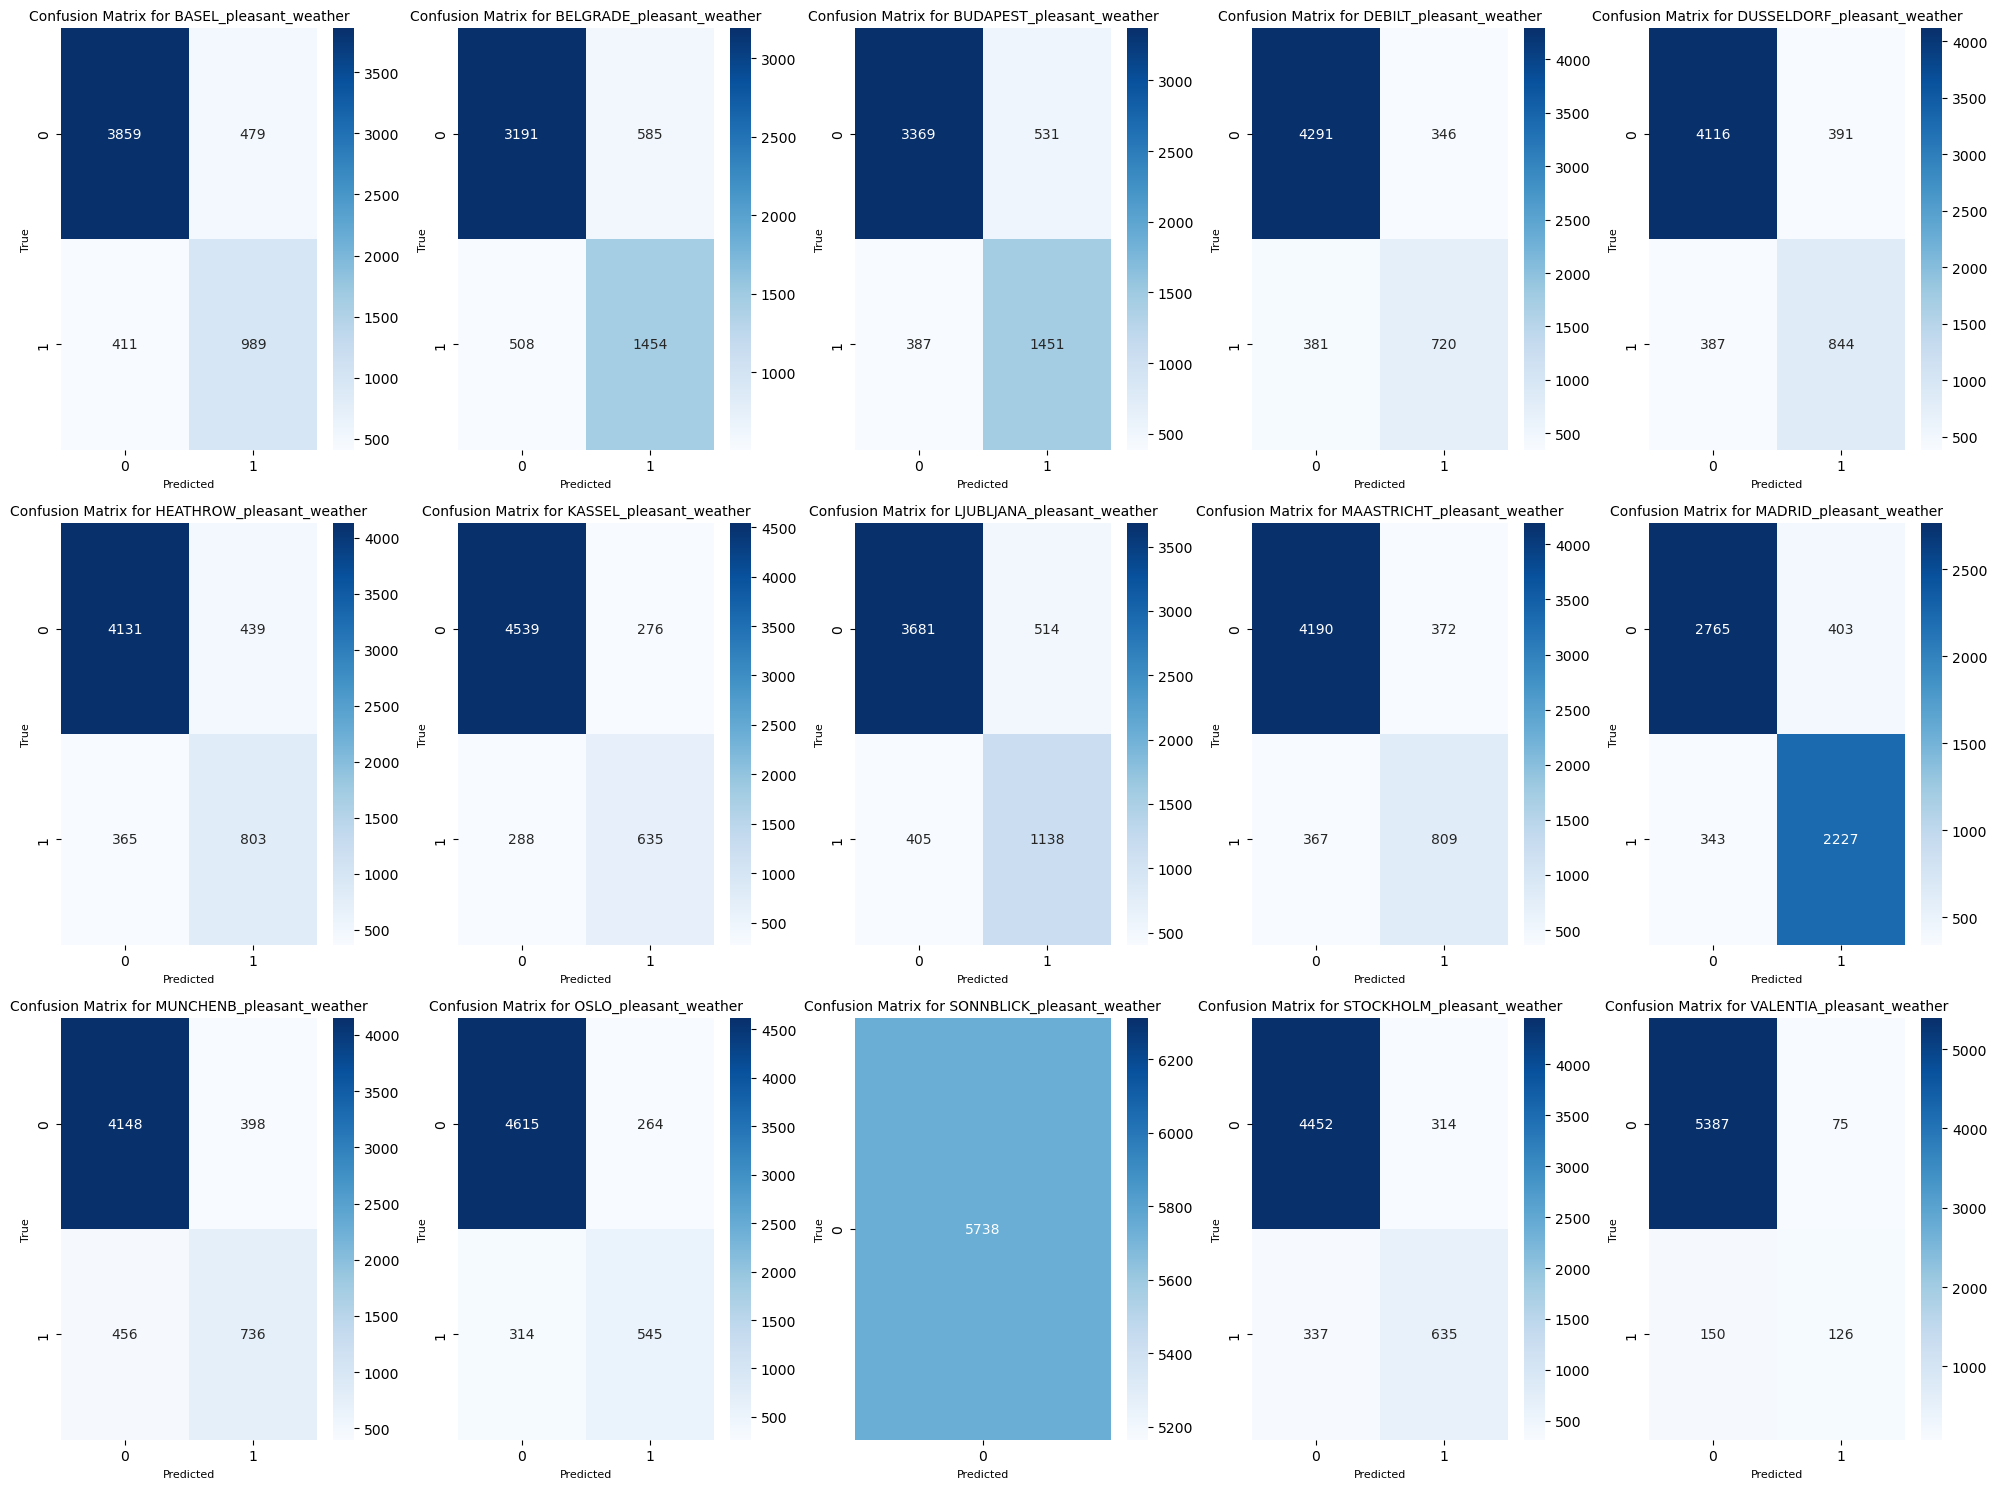

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create subplots for a 3x5 grid (15 stations)
n_rows = 3
n_cols = 5
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()

# Loop through each station, calculate confusion matrix, and plot
for i, column in enumerate(y_test.columns):
    # Compute confusion matrix for each station
    cm = confusion_matrix(y_test[column], y_pred_weighted[:, i])
    
    # Plot confusion matrix in the corresponding subplot
    sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=axes[i])
    
    # Add titles and labels
    axes[i].set_title(f"Confusion Matrix for {column}", fontsize=10)
    axes[i].set_xlabel('Predicted', fontsize=8)
    axes[i].set_ylabel('True', fontsize=8)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

# 08- Regularization- tuning distance metrics and number of neighbors

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid for tuning both n_neighbors and distance metrics
param_grid = {
    'n_neighbors': [3, 4, 5, 6, 7],  # Testing a range of neighbors
    'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']  # Different distance metrics
}

# Initialize KNN with distance-based weighting
knn = KNeighborsClassifier(weights='distance')

# Use GridSearchCV to find the best combination of n_neighbors and metric
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best combination of n_neighbors and metric
best_knn = grid_search.best_estimator_
print(f"Best parameters: {grid_search.best_params_}")

# Train the KNN model with the best parameters
multi_target_knn = MultiOutputClassifier(best_knn)
multi_target_knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = multi_target_knn.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Macro Avg): {precision:.4f}")
print(f"Recall (Macro Avg): {recall:.4f}")
print(f"F1 Score (Macro Avg): {f1:.4f}")


C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jphil\anacond

C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jphil\anacond

C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jphil\anacond

C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jphil\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
C:\Users\jphil\anacond

Best parameters: {'metric': 'manhattan', 'n_neighbors': 6}
Accuracy: 0.4456
Precision (Macro Avg): 0.7360
Recall (Macro Avg): 0.7236
F1 Score (Macro Avg): 0.7270


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 6, 7, 10],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

# Initialize KNN classifier
knn = KNeighborsClassifier()

# Set up GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

# Print the best parameters and corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Evaluate the best model on the test set
best_knn = grid_search.best_estimator_
test_accuracy = best_knn.score(X_test, y_test)
print(f"Test set accuracy with best parameters: {test_accuracy}")

# You can also evaluate precision, recall, and F1-score for the best model
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = best_knn.predict(X_test)

# Calculate metrics
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro', zero_division=1)
f1 = f1_score(y_test, y_pred, average='macro', zero_division=1)

print(f"Precision (Macro Avg): {precision}")
print(f"Recall (Macro Avg): {recall}")
print(f"F1 Score (Macro Avg): {f1}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}
Best cross-validation accuracy: 0.4344059973642299
Test set accuracy with best parameters: 0.4456256535378181
Precision (Macro Avg): 0.7359979290243299
Recall (Macro Avg): 0.7236114546612585
F1 Score (Macro Avg): 0.7270339025306273
